Prepare a prototype machine learning model. The company develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold ore. Use data with mining and cleaning parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

1. Prepare data;
2. Conduct exploratory data analysis;
3. Build and train the model.

## Preparing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [2]:
train = pd.read_csv('datasets/gold_recovery_train_new.csv')
test = pd.read_csv('datasets/gold_recovery_test_new.csv')
full = pd.read_csv('datasets/gold_recovery_full_new.csv')

### Exploring data

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
train.isna().sum().sort_values(ascending=False).head(60)/len(train)*100

secondary_cleaner.output.tail_sol                     11.343558
rougher.state.floatbank10_e_air                        3.081490
rougher.input.floatbank11_xanthate                     3.024949
primary_cleaner.output.concentrate_sol                 2.021344
secondary_cleaner.state.floatbank2_a_air               1.533677
final.output.concentrate_sol                           1.491271
rougher.input.feed_size                                1.017740
primary_cleaner.input.xanthate                         0.706764
rougher.input.feed_pb                                  0.706764
final.output.tail_pb                                   0.706764
primary_cleaner.output.concentrate_pb                  0.607817
rougher.input.feed_sol                                 0.551276
primary_cleaner.output.tail_sol                        0.325111
rougher.input.floatbank11_sulfate                      0.254435
primary_cleaner.input.depressant                       0.226164
rougher.input.floatbank10_sulfate       

In [7]:
test.isna().sum().sort_values(ascending=False).head(20)/len(test)*100

rougher.input.floatbank11_xanthate            0.472590
rougher.input.feed_sol                        0.396975
secondary_cleaner.state.floatbank3_a_air      0.170132
rougher.input.floatbank11_sulfate             0.151229
primary_cleaner.input.depressant              0.094518
rougher.input.floatbank10_sulfate             0.094518
primary_cleaner.input.xanthate                0.075614
primary_cleaner.input.sulfate                 0.075614
rougher.input.feed_rate                       0.056711
secondary_cleaner.state.floatbank2_a_air      0.056711
secondary_cleaner.state.floatbank2_b_air      0.037807
rougher.input.feed_size                       0.018904
secondary_cleaner.state.floatbank2_b_level    0.000000
rougher.state.floatbank10_f_level             0.000000
rougher.state.floatbank10_f_air               0.000000
secondary_cleaner.state.floatbank3_a_level    0.000000
secondary_cleaner.state.floatbank2_a_level    0.000000
date                                          0.000000
rougher.st

In [8]:
full.isna().sum().sort_values(ascending=False).head(60)/len(full)*100

secondary_cleaner.output.tail_sol                     8.992232
rougher.input.floatbank11_xanthate                    2.330367
rougher.state.floatbank10_e_air                       2.242914
primary_cleaner.output.concentrate_sol                1.903390
secondary_cleaner.state.floatbank2_a_air              1.131745
final.output.concentrate_sol                          1.085447
rougher.input.feed_size                               0.745923
primary_cleaner.output.concentrate_pb                 0.596739
primary_cleaner.input.xanthate                        0.535007
final.output.tail_pb                                  0.519574
rougher.input.feed_pb                                 0.514430
rougher.input.feed_sol                                0.509285
primary_cleaner.output.tail_sol                       0.318946
rougher.input.floatbank11_sulfate                     0.226349
primary_cleaner.input.depressant                      0.190339
rougher.input.floatbank10_sulfate                     0

<AxesSubplot:>

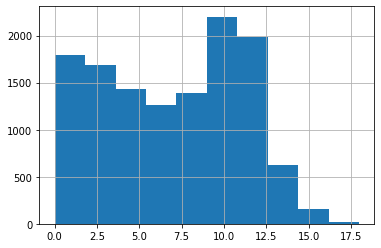

In [9]:
fig, axes = plt.subplots(facecolor='white')

train['secondary_cleaner.output.tail_sol'].hist(ax=axes)

<AxesSubplot:>

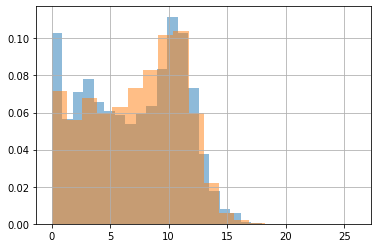

In [10]:
fig, axes = plt.subplots(facecolor='white')

train['secondary_cleaner.output.tail_sol'].hist(density= True, bins=20, alpha=0.5, ax=axes)
full['secondary_cleaner.output.tail_sol'].hist(density= True, bins=20, alpha=0.5, ax=axes)

**Results**

1. The date must be converted to the date format
2. Many indicators are missing data
3. The data in the test and training samples is different, in the latter there are much more missing values.
4. According to the indicator secondary_cleaner.output.tail_sol - more than 10% of gaps, a strong difference between the training and the full distribution sample. Perhaps we should not use this indicator in models?

### Calculation of Enrichment Efficiency

$$Recovery = (C*(F-T))/(F*(C-T))$$

where

* C is the proportion of gold in the concentrate after flotation/refining;
 
* F is the share of gold in the raw material/concentrate before flotation/refining;

* T is the proportion of gold in tailings after flotation/cleaning.

All 3 parts are about the concentration of gold. That is, we need to find it in the names

In [11]:
train.head()
x = pd.DataFrame(train.columns, columns=['names'])
y = x['names'].str.split('.', n = 2, expand=True)
x['train_1'] = y[0]
x['train_2'] = y[1]
x['train_3'] = y[2]
x = x.dropna()

In [12]:
x.query('train_3 == "concentrate_au"')

,names,train_1,train_2,train_3
4,final.output.concentrate_au,final,output,concentrate_au
17,primary_cleaner.output.concentrate_au,primary_cleaner,output,concentrate_au
47,rougher.output.concentrate_au,rougher,output,concentrate_au


In [13]:
x[x['train_3'].str.contains(r'au')]

,names,train_1,train_2,train_3
4,final.output.concentrate_au,final,output,concentrate_au
9,final.output.tail_au,final,output,tail_au
17,primary_cleaner.output.concentrate_au,primary_cleaner,output,concentrate_au
21,primary_cleaner.output.tail_au,primary_cleaner,output,tail_au
30,rougher.calculation.sulfate_to_au_concentrate,rougher,calculation,sulfate_to_au_concentrate
31,rougher.calculation.floatbank10_sulfate_to_au_...,rougher,calculation,floatbank10_sulfate_to_au_feed
32,rougher.calculation.floatbank11_sulfate_to_au_...,rougher,calculation,floatbank11_sulfate_to_au_feed
33,rougher.calculation.au_pb_ratio,rougher,calculation,au_pb_ratio
39,rougher.input.feed_au,rougher,input,feed_au
47,rougher.output.concentrate_au,rougher,output,concentrate_au


In [14]:
x['names'].to_list()

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floa

What indicators do we need:

**rougher.output.recovery** - compare with it. Compare obtained after floatation

* C is the proportion of gold in the concentrate after flotation/refining; **rougher.output.concentrate_au**

* F is the share of gold in the raw material/concentrate before flotation/refining; **rougher.input.feed_au**

* T is the proportion of gold in tailings after flotation/cleaning. **rougher.output.tail_au**



In [15]:
check_rec = train[['rougher.output.recovery',
                   'rougher.output.concentrate_au',
                   'rougher.input.feed_au',
                  'rougher.output.tail_au']]

In [16]:
check_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.recovery        14149 non-null  float64
 1   rougher.output.concentrate_au  14149 non-null  float64
 2   rougher.input.feed_au          14149 non-null  float64
 3   rougher.output.tail_au         14149 non-null  float64
dtypes: float64(4)
memory usage: 442.3 KB


In [17]:
check_rec.head()

,rougher.output.recovery,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
0,87.107763,19.793808,6.486150,1.170244
1,86.843261,20.050975,6.478583,1.184827
2,86.842308,19.737170,6.362222,1.162562
3,87.226430,19.320810,6.118189,1.079755
4,86.688794,19.216101,5.663707,1.012642


In [18]:
def calculate_recovery(c, f, t):
    recovery = (c * (f-t)) /(f*(c-t)) * 100
    return recovery

In [19]:
check_rec['rougher.output.recovery_calc'] = calculate_recovery(check_rec['rougher.output.concentrate_au'], 
                  check_rec['rougher.input.feed_au'],
                  check_rec['rougher.output.tail_au'])

In [20]:
check_rec['comparison'] = check_rec['rougher.output.recovery'] - check_rec['rougher.output.recovery_calc']

In [21]:
check_rec['comparison'].sum()

1.964650664376677e-12

In [22]:
check_rec.describe()

,rougher.output.recovery,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery_calc,comparison
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,1.414900e+04
mean,82.704502,19.439958,7.866577,1.757473,82.704502,1.388544e-16
std,14.479156,3.765192,1.919506,0.713187,14.479156,1.475784e-14
min,0.000000,0.000000,0.010000,0.020676,-0.000000,-7.105427e-14
25%,79.993067,18.432161,6.596217,1.310800,79.993067,-1.421085e-14
50%,85.299462,19.947312,7.649138,1.745513,85.299462,0.000000e+00
75%,90.165021,21.392714,9.066976,2.186790,90.165021,1.421085e-14
max,100.000000,28.146838,13.126043,9.688980,100.000000,8.526513e-14


**Results**

The enrichment efficiency index was calculated. The existing calculation is correct, however, it is calculated additionally by multiplying it by 100.

### Compare the presence of indicators/columns in 3 tables

In [23]:
print(len(train.columns))
print(len(full.columns))
print(len(test.columns))

87
87
53


In [24]:
x = pd.DataFrame(train.columns, columns=['train'])
y = pd.DataFrame(full.columns, columns=['full'])
z = pd.DataFrame(test.columns, columns=['test'])
x = x.merge(y, how='outer', left_on='train', right_on='full')
x = x.merge(z, how='outer', left_on='train', right_on='test')

In [25]:
print(x['train'].isnull().sum())
print(x['full'].isnull().sum())
print(x['test'].isnull().sum())

0
0
34


In [26]:
print(x[x['test'].isnull()]['full'])

1                           final.output.concentrate_ag
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                           final.output.concentrate_au
5                                 final.output.recovery
6                                  final.output.tail_ag
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                                  final.output.tail_au
14                primary_cleaner.output.concentrate_ag
15                primary_cleaner.output.concentrate_pb
16               primary_cleaner.output.concentrate_sol
17                primary_cleaner.output.concentrate_au
18                       primary_cleaner.output.tail_ag
19                       primary_cleaner.output.tail_pb
20                      primary_cleaner.output.tail_sol
21                       primary_cleaner.output.tail_au
30        rougher.calculation.sulfate_to_au_conc

It can be seen that there are no columns with names containg *output* and *calculation* in test.

In [27]:
y = x['train'].str.split('.', n = 2, expand=True)
x['train_1'] = y[0]
x['train_2'] = y[1]
x['train_3'] = y[2]
x

,train,full,test,train_1,train_2,train_3
0,date,date,date,date,None,None
1,final.output.concentrate_ag,final.output.concentrate_ag,NaN,final,output,concentrate_ag
2,final.output.concentrate_pb,final.output.concentrate_pb,NaN,final,output,concentrate_pb
3,final.output.concentrate_sol,final.output.concentrate_sol,NaN,final,output,concentrate_sol
4,final.output.concentrate_au,final.output.concentrate_au,NaN,final,output,concentrate_au
...,...,...,...,...,...,...
82,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner,state,floatbank5_a_level
83,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner,state,floatbank5_b_air
84,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner,state,floatbank5_b_level
85,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner,state,floatbank6_a_air


In [28]:
print(x.groupby('train_2')['test'].count(), 
      x.groupby('train_2')['train'].count())

train_2
calculation     0
input          14
output          0
state          38
Name: test, dtype: int64 train_2
calculation     4
input          14
output         30
state          38
Name: train, dtype: int64


There is not a single *output* and *calculation* indicator in the test data.

When building a model, it will be necessary to exclude these indicators from consideration.

### Data preprocessing

1. Convert date to date format
2. Fill in the blanks
3. Check for duplicates

In [29]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [30]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
full['date'] = pd.to_datetime(full['date'])

In [31]:
x = train.dropna()
x = x.drop('date', axis=1)
x = x.diff(axis=0).mad()
x.sort_values(ascending=False).head(15)

rougher.calculation.sulfate_to_au_concentrate         9478.340686
rougher.calculation.floatbank11_sulfate_to_au_feed     146.453214
rougher.calculation.floatbank10_sulfate_to_au_feed     146.093035
rougher.input.feed_rate                                 22.568718
rougher.state.floatbank10_d_air                          9.531452
primary_cleaner.input.sulfate                            7.117770
rougher.state.floatbank10_c_air                          6.549790
rougher.state.floatbank10_b_air                          6.544542
primary_cleaner.state.floatbank8_d_air                   6.421302
primary_cleaner.state.floatbank8_d_level                 5.557155
rougher.state.floatbank10_e_air                          5.139641
primary_cleaner.state.floatbank8_a_air                   4.543652
rougher.state.floatbank10_a_air                          4.500322
rougher.state.floatbank10_f_air                          4.476555
primary_cleaner.state.floatbank8_b_air                   4.357560
dtype: flo

In [32]:
x = train.dropna()
x = x.drop('date', axis=1)
x = x.diff(axis=0).mean()
x.sort_values()

rougher.calculation.floatbank11_sulfate_to_au_feed   -0.093656
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.090260
rougher.state.floatbank10_d_air                      -0.059021
rougher.state.floatbank10_f_air                      -0.051402
rougher.state.floatbank10_c_air                      -0.050390
                                                        ...   
rougher.state.floatbank10_a_level                     0.009459
secondary_cleaner.state.floatbank6_a_level            0.009681
primary_cleaner.state.floatbank8_b_level              0.010571
rougher.state.floatbank10_a_air                       0.017841
rougher.calculation.sulfate_to_au_concentrate         0.199452
Length: 86, dtype: float64

In [33]:
y = train.drop('date', axis=1).mean()
y

final.output.concentrate_ag                     5.142034
final.output.concentrate_pb                    10.132960
final.output.concentrate_sol                    9.202849
final.output.concentrate_au                    44.003792
final.output.recovery                          66.518832
                                                 ...    
secondary_cleaner.state.floatbank5_a_level   -483.956022
secondary_cleaner.state.floatbank5_b_air       13.064590
secondary_cleaner.state.floatbank5_b_level   -483.966564
secondary_cleaner.state.floatbank6_a_air       19.577539
secondary_cleaner.state.floatbank6_a_level   -506.798480
Length: 86, dtype: float64

In [34]:
(x / y *100).sort_values()

primary_cleaner.output.concentrate_sol   -0.011959
secondary_cleaner.output.tail_sol        -0.011467
secondary_cleaner.output.tail_ag         -0.009217
secondary_cleaner.output.tail_pb         -0.007287
rougher.calculation.au_pb_ratio          -0.006566
                                            ...   
rougher.input.floatbank11_xanthate        0.005089
rougher.input.floatbank10_xanthate        0.005118
final.output.tail_pb                      0.005669
rougher.input.feed_size                   0.005898
primary_cleaner.output.tail_pb            0.009357
Length: 86, dtype: float64

In [35]:
train = train.fillna(method='ffill', axis=0)

In [36]:
test = test.fillna(method='ffill', axis=0)

**Results**

1. Data is filled by copying the last filled data down (ffill) - this is done because the data is sorted by date and records close in time should be similar in terms of the task. 

* The correctness of this method was tested. For each indicator, the average difference between 2 successive values was calculated and divided by the average of this indicator. As a result, the average difference between 2 close observations is less than 1 hundredth of a percent.
2. Date converted to date format

## Data analysis

### Concentration of metals (Au, Ag, Pb) at various purification steps

1. Select in what indicators the concentration is described
2. Make a list of material types
3. Make a boxplot plot to show the distribution at different stages of cleaning
4. Distribution description

In [37]:
x = pd.DataFrame(train.columns, columns=['names'])
conc_materials = x[x['names'].str.contains(r'concentrate')]

In [38]:
conc_materials = conc_materials.query('names != "rougher.calculation.sulfate_to_au_concentrate"')

In [39]:
conc_materials

,names
1,final.output.concentrate_ag
2,final.output.concentrate_pb
3,final.output.concentrate_sol
4,final.output.concentrate_au
14,primary_cleaner.output.concentrate_ag
15,primary_cleaner.output.concentrate_pb
16,primary_cleaner.output.concentrate_sol
17,primary_cleaner.output.concentrate_au
44,rougher.output.concentrate_ag
45,rougher.output.concentrate_pb


In [40]:
material_types = ['ag', 'pb', 'sol', 'au']

Analyzing ag


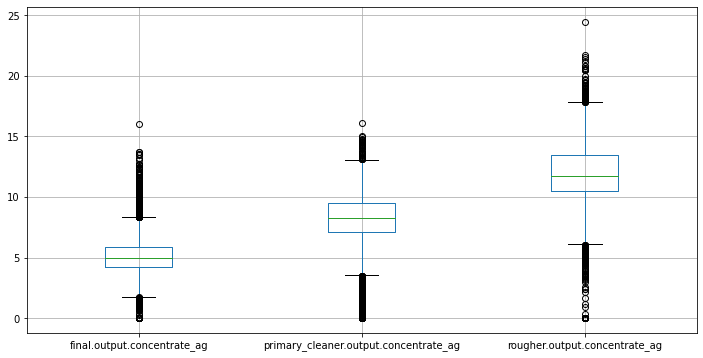

Analyzing pb


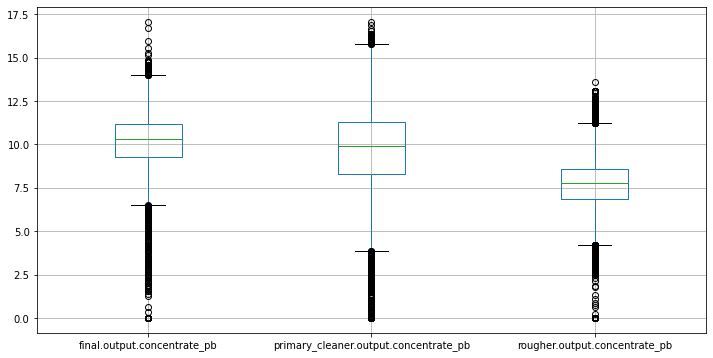

Analyzing sol


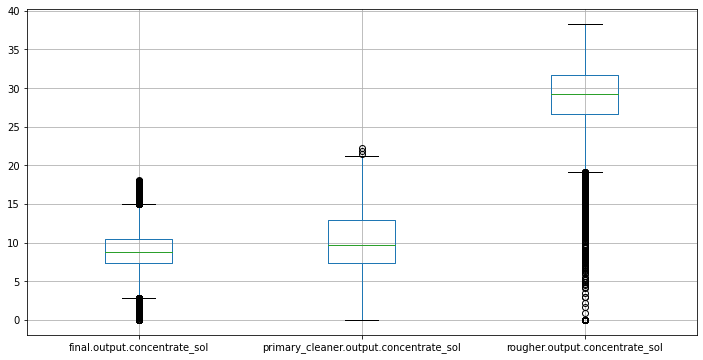

Analyzing au


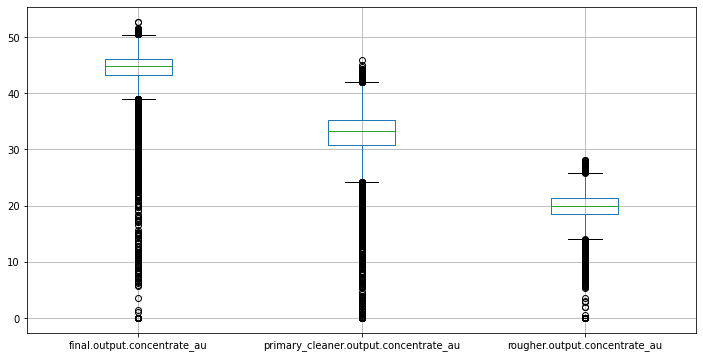

In [41]:
for type in material_types:
    fig, axes = plt.subplots(facecolor='white', figsize=(12,6))
    print("Analyzing", type)
    x = conc_materials[conc_materials['names'].str.contains(type)]
    y = train[list(x['names'].values)]
    y.boxplot(ax=axes)
    plt.show()

Analyzing ag


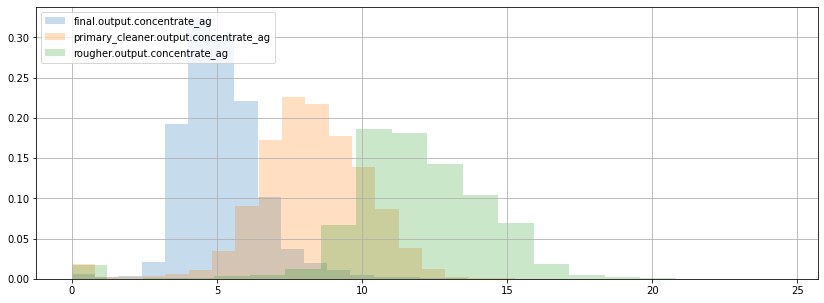

Analyzing pb


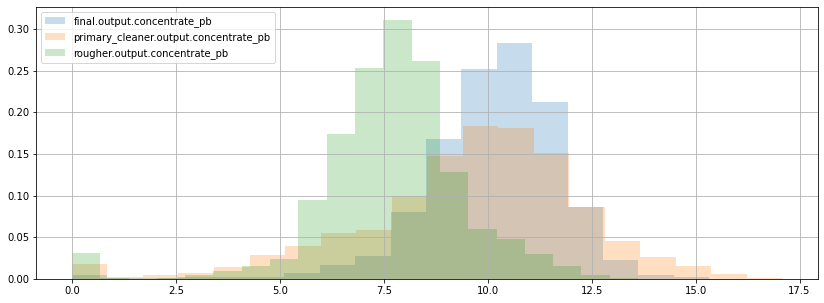

Analyzing sol


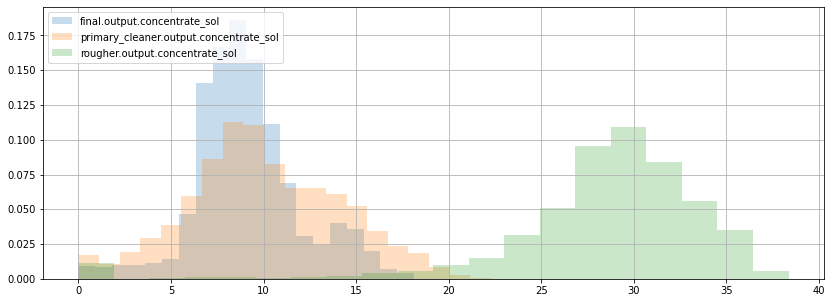

Analyzing au


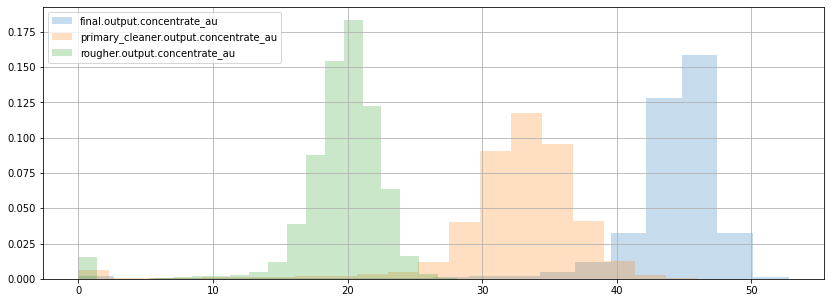

In [42]:
for type in material_types:
    x = conc_materials[conc_materials['names'].str.contains(type)]
    y = train[list(x['names'].values)]
    fig, ax = plt.subplots(facecolor='white')
    x1 = list(x['names'].values)
    for col in x1:
        ax.plot = y[col].hist(density= True, bins=20, alpha=0.25, label = col)
    ax.legend(loc=2)
    fig.set_figheight(5)
    fig.set_figwidth(14)
    print("Analyzing", type)
    plt.show()

**Charts**

1. An analysis was made for the concentration of 4 types of materials

**AG**

2. The concentration is reduced by almost 2 times between the start of processing and its completion. Also, the spread of the indicator falls by 2 times

**PB**

3. The concentration increases slightly from the beginning of the treatment to the end of it, but among all materials it is more stable between stages: an increase of about 30% of the average value.
4. At the primary_cleaner stage, a higher concentration spread

**SOL**

5. Maximum concentration at the rougher stage, after which it drops sharply. There is practically no change in the average value between the last 2 stages of cleaning, although there is a decrease in the spread

**AU**

6. The increase in concentration is the highest among all materials - 2.26 times. Most growth occurs between the rougher and primary_cleaner stages

In [43]:
for type in material_types:
    print("Анализ", type)
    x = conc_materials[conc_materials['names'].str.contains(type)]
    y = train[list(x['names'].values)]    
    display(y.describe())

Анализ ag


,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.output.concentrate_ag
count,14149.000000,14149.000000,14149.000000
mean,5.141921,8.200916,11.775812
std,1.369603,2.005185,2.731747
min,0.000000,0.000000,0.000000
25%,4.211500,7.107126,10.486871
50%,4.994607,8.226247,11.747362
75%,5.859495,9.504924,13.426419
max,16.001945,16.081632,24.480271


Анализ pb


,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.output.concentrate_pb
count,14149.000000,14149.000000,14149.000000
mean,10.132848,9.568544,7.664555
std,1.654925,2.709330,1.856279
min,0.000000,0.000000,0.000000
25%,9.296833,8.315997,6.850501
50%,10.297013,9.920598,7.760435
75%,11.170578,11.298487,8.601927
max,17.031899,17.081278,13.617072


Анализ sol


,final.output.concentrate_sol,primary_cleaner.output.concentrate_sol,rougher.output.concentrate_sol
count,14149.000000,14149.000000,14149.000000
mean,9.109311,10.016250,28.292820
std,2.886929,4.110548,6.119659
min,0.000000,0.000000,0.000000
25%,7.422466,7.376454,26.696213
50%,8.801909,9.648025,29.254966
75%,10.452148,12.974629,31.743943
max,18.124851,22.280845,38.351193


Анализ au


,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.output.concentrate_au
count,14149.000000,14149.000000,14149.000000
mean,44.003792,32.386836,19.439958
std,4.905261,5.798843,3.765192
min,0.000000,0.000000,0.000000
25%,43.276111,30.857764,18.432161
50%,44.872436,33.225835,19.947312
75%,46.166425,35.330145,21.392714
max,52.756638,45.933934,28.146838


In [44]:
print('For some reason, there are records where the concentration of gold at stage 1 is 0, and later on the other - is not 0')
for name in y:
    for second_name in y:
        if name != second_name:
            print("When we have 0 concentration in", name, )
            print("Stage concentration", second_name, "become", round(y[y[name] == 0][second_name].mean(),1))
            print()

For some reason, there are records where the concentration of gold at stage 1 is 0, and later on the other - is not 0
When we have 0 concentration in final.output.concentrate_au
Stage concentration primary_cleaner.output.concentrate_au become 30.9

When we have 0 concentration in final.output.concentrate_au
Stage concentration rougher.output.concentrate_au become 20.0

When we have 0 concentration in primary_cleaner.output.concentrate_au
Stage concentration final.output.concentrate_au become 40.3

When we have 0 concentration in primary_cleaner.output.concentrate_au
Stage concentration rougher.output.concentrate_au become 18.1

When we have 0 concentration in rougher.output.concentrate_au
Stage concentration final.output.concentrate_au become 44.6

When we have 0 concentration in rougher.output.concentrate_au
Stage concentration primary_cleaner.output.concentrate_au become 33.5



**Results**

1. Strange situation, with 0 gold concentration. It can be 0 in the initial stage, then get higher in the final stage, and vice versa. Maybe, we should exclude such situations + check with other materials

**Concentration**

2. An analysis was made for the concentration of 4 types of materials

**AG**

3. The concentration is reduced by almost 2 times between the start of processing and its completion. Also, the spread of the indicator falls by 2 times

**PB**

4. The concentration increases slightly from the beginning of the treatment to the end of it, but among all materials it is more stable between stages: an increase of about 30% of the average value.
5. At the primary_cleaner stage, a higher concentration spread

**SOL**

6. Maximum concentration at the rougher stage, after which it drops sharply. There is practically no change in the average value between the last 2 stages of cleaning, although there is a decrease in the spread

**AU**

7. The increase in concentration is the highest among all materials - 2.26 times. Most growth occurs between the rougher and primary_cleaner stages

### Distribution of raw material granule sizes on the training and test samples

In [45]:
x = pd.DataFrame(train.columns, columns=['names'])
size_materials = x[x['names'].str.contains(r'feed_size')]
size_materials

,names
12,primary_cleaner.input.feed_size
37,rougher.input.feed_size


* The size of the granules occurs in 2 stages
1. Convert them to a sheet
2. Let's build distributions for 2 samples - train and test
3. Check the stat with tests:
     1. The fact that the average of the samples is the same
     2. The fact that the samples belong to the same distribution (Kolmogorov–Smirnov test)

In [46]:
size_materials = list(size_materials['names'].values)

<AxesSubplot:>

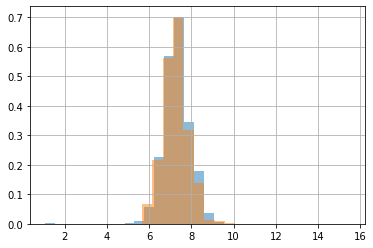

In [47]:
fig, axes = plt.subplots(facecolor='white')

train[size_materials[0]].hist(density= True, bins=20, alpha=0.5, ax=axes)
test[size_materials[0]].hist(density= True, bins=20, alpha=0.5, ax=axes)

In [48]:
display(train[size_materials[0]].describe(), test[size_materials[0]].describe())

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

In [49]:

results = st.ttest_ind(train[size_materials[0]], test[size_materials[0]])
alpha = 0.05

print("Null hypothesis: the average size of the materials in the primary cleaning stage is the same")
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 
    
print()
results = st.ks_2samp(train[size_materials[0]], test[size_materials[0]])    
print("Null hypothesis: same distribution of 2 samples")
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 
        

Null hypothesis: the average size of the materials in the primary cleaning stage is the same
p-значение: 1.4864182925957636e-08
Rejecting the null hypothesis

Null hypothesis: same distribution of 2 samples
p-значение: 3.5273935105512727e-12
Rejecting the null hypothesis


<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Если мы говорим, что размеры разные, можем ли мы идти дальше? Какие корректировки нам стоит сделать?
</div>

<div class="alert alert-block alert-info">
    
В выводах предложил пересобрать тестовую и обучающую выборку
    
</div>


<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Это ответ на корректировки)А на то, можем ли мы идти дальше?)
</div>

<AxesSubplot:>

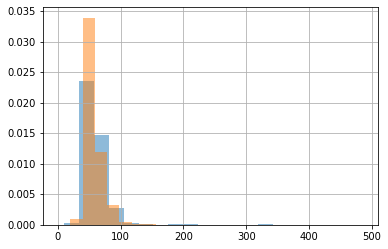

In [50]:
fig, axes = plt.subplots(facecolor='white')

train[size_materials[1]].hist(density= True, bins=20, alpha=0.5, ax=axes)
test[size_materials[1]].hist(density= True, bins=20, alpha=0.5, ax=axes)

In [51]:
display(train[size_materials[1]].describe(), test[size_materials[1]].describe())

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

In [52]:
results = st.ttest_ind(train[size_materials[1]], test[size_materials[1]])
alpha = 0.05

print("Null hypothesis: the average size of the materials in the flotation stage is the same")
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 
    
print()
results = st.ks_2samp(train[size_materials[1]], test[size_materials[1]])    
print("Null hypothesis: same distribution of 2 samples")
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

Null hypothesis: the average size of the materials in the flotation stage is the same
p-значение: 1.6081245670851188e-33
Rejecting the null hypothesis

Null hypothesis: same distribution of 2 samples
p-значение: 5.1997046130555955e-213
Rejecting the null hypothesis


**Results**

1. The plotted distribution graphs shows a more or less similar distribution in the primary treatment, and a significant difference on the flotation stage
2. However, the tests showed differences between the test and train samples for both stages, with the largest difference at the stage of floatation
3. Ideally, we should rebuild the test and training samples 

### The total concentration of all substances at different stages

1. Concentration indicators are already collected in previous steps
2. Create a list of stages
3. At the beginning, we will show a graph of the concentration of materials by stages
4. Summarize and show the total distribution
5. Let's see how the composition changes

In [53]:
conc_materials

,names
1,final.output.concentrate_ag
2,final.output.concentrate_pb
3,final.output.concentrate_sol
4,final.output.concentrate_au
14,primary_cleaner.output.concentrate_ag
15,primary_cleaner.output.concentrate_pb
16,primary_cleaner.output.concentrate_sol
17,primary_cleaner.output.concentrate_au
44,rougher.output.concentrate_ag
45,rougher.output.concentrate_pb


In [54]:
stages = ['rougher', 'primary_cleaner', 'final']

Analyzing: rougher stage


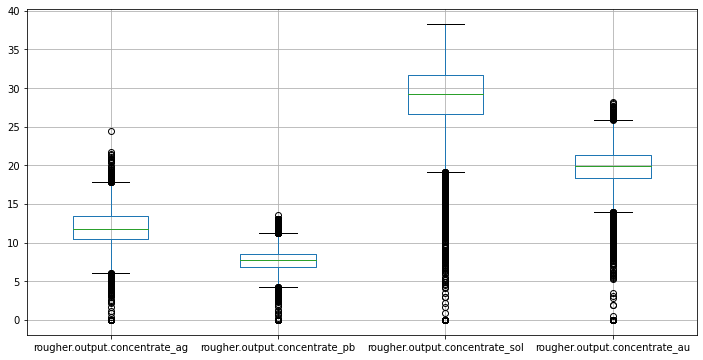

Analyzing: primary_cleaner stage


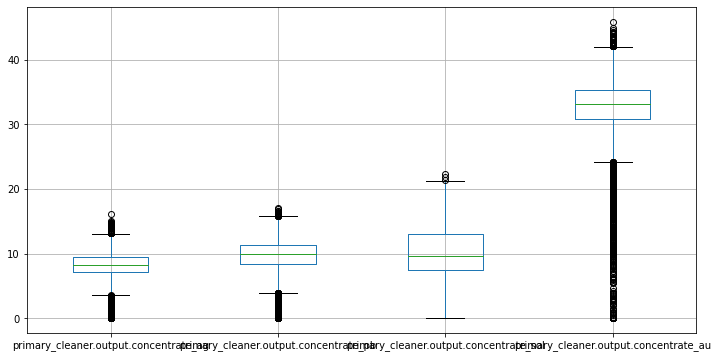

Analyzing: final stage


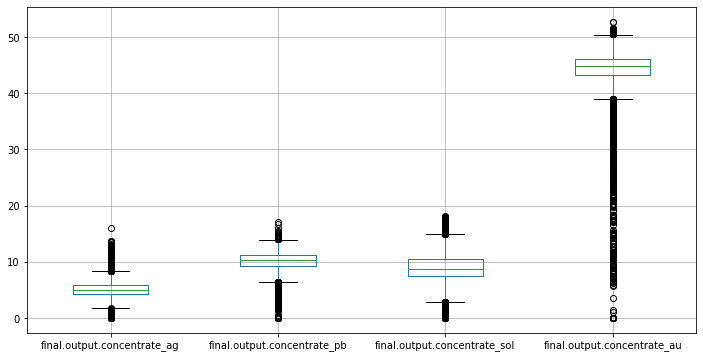

In [55]:
for stage in stages:
    fig, axes = plt.subplots(facecolor='white', figsize=(12,6))
    print("Analyzing:", stage, 'stage')
    x = conc_materials[conc_materials['names'].str.contains(stage)]
    y = train[list(x['names'].values)]
    y.boxplot()
    plt.show()

In [56]:
z = pd.DataFrame()
for stage in stages:
    x = conc_materials[conc_materials['names'].str.contains(stage)]
    y = train[list(x['names'].values)]
    y['total'] = y[list(x['names'].values)].sum(axis=1)
    z[stage] = y['total']

<AxesSubplot:>

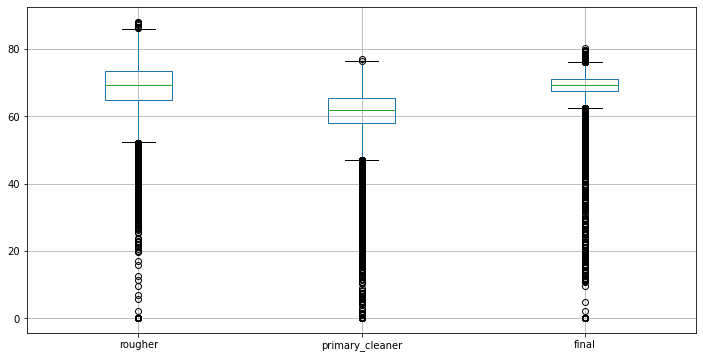

In [57]:
fig, axes = plt.subplots(facecolor='white', figsize=(12,6))

z.boxplot()

Analyzing: rougher stage


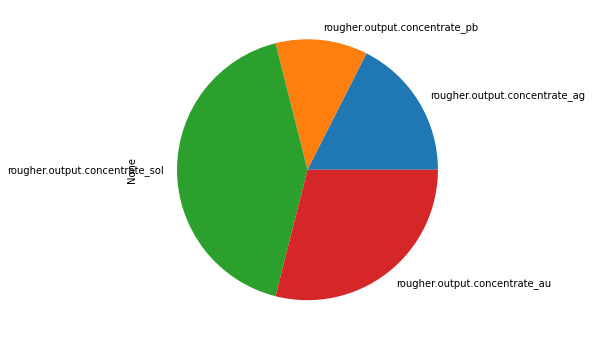

Analyzing: primary_cleaner stage


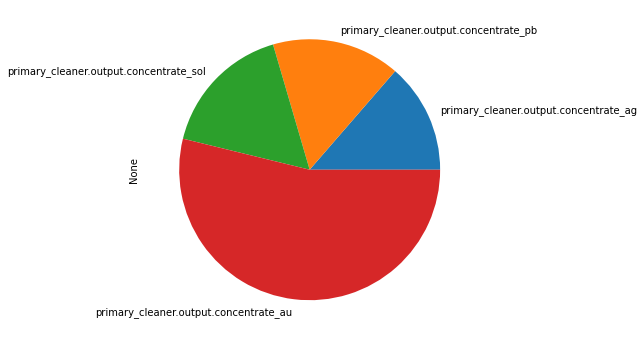

Analyzing: final stage


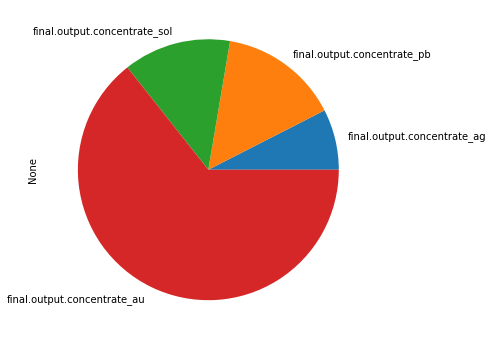

In [58]:
for stage in stages:
    fig, axes = plt.subplots(facecolor='white', figsize=(12,6))

    print("Analyzing:", stage, 'stage')
    x = conc_materials[conc_materials['names'].str.contains(stage)]
    y = train[list(x['names'].values)]
    z = y.mean()
    plot = z.plot.pie()
    plt.show()

In [59]:
print("Share AU")
for stage in stages:
    print("Analyzing:", stage, 'stage')
    x = conc_materials[conc_materials['names'].str.contains(stage)]
    x1 = x[x['names'].str.contains('au')]
    y = train[list(x['names'].values)]
    y1 = train[list(x1['names'].values)].mean()
    z = y.mean()
    print(round(y1/ z.sum()*100, 2))
    print()

Share AU
Analyzing: rougher stage
rougher.output.concentrate_au    28.94
dtype: float64

Analyzing: primary_cleaner stage
primary_cleaner.output.concentrate_au    53.82
dtype: float64

Analyzing: final stage
final.output.concentrate_au    64.34
dtype: float64



**Conclusions**

1. Graphs are built. At the beginning there is a drop in concentration (most likely due to sol), then it is restored
2. It is not clear whether sol should be taken into account in this analysis and in the analysis in section 2.1

3. Initially, at the rougher stage, the share of gold in the total concentration is less than 28.9%. When moving to the primary_cleaner stage, 54% of the concentration falls on gold. There was a drop in the share of sol in the concentrate and an increase in the concentration of gold

4. At the final stage, the share of gold among 4 materials reaches 64%, this is ensured both by an increase in the gold concentration itself and by a slight drop in ag

## Model

### Function for calculating the final sMAPE

In [60]:
def smape(fact, predict):
    smape = (
        1 / len(fact) *
            sum(abs(fact - predict)/
               ((abs(fact)+abs(predict))/2)))*100
    return smape  

In [61]:
d = {'fact': [1, 1, 1, 1, 1], 'predict': [0, 0, 0, 0, 0]}
x = pd.DataFrame(data=d)
smape(x['fact'], x['predict'])

200.0

In [62]:
d = {'fact': [100, 100, 100, 100, 100], 'predict': [200, 200, 200, 200, 200]}
x = pd.DataFrame(data=d)
smape(x['fact'], x['predict'])

66.66666666666666

In [63]:
d = {'fact': [1, 1, 1, 1, 1], 'predict': [2, 2, 2, 2, 2]}
x = pd.DataFrame(data=d)
smape(x['fact'], x['predict'])

66.66666666666666

### Training different models and evaluating their quality by cross-validation

As far as I understand there are 2 approaches:
1. 1 model that predicts both indicators
2. 2 models for 2 cleaning stages. 

Since option 2 will allow you to choose better models for a particular block, I use it.

1. Remove columns not available in test
2. Remove the dates from the data
3. Select targets
4. Upload targets to test

In [64]:
x = pd.DataFrame(train.columns, columns=['names'])
x = x[~x['names'].str.contains(r'output')]
x = x[~x['names'].str.contains(r'calculation')]
x = x.reset_index()
x = x.drop('index', axis=1)
y = pd.DataFrame(test.columns, columns=['names'])
x.equals(y)

True

In [65]:
features_train = train[list(x['names'].values)].drop(columns='date')
target_train_rough = train['rougher.output.concentrate_au']
target_train_final = train['final.output.concentrate_au']

In [66]:
features_test = test.drop(columns='date')

In [67]:
test_1 = test.merge(full[['date', 'rougher.output.concentrate_au', 'final.output.concentrate_au']],
                    how='left', left_on='date', right_on='date')
test_1[['rougher.output.concentrate_au', 'final.output.concentrate_au']].isna().sum()

rougher.output.concentrate_au    0
final.output.concentrate_au      0
dtype: int64

In [68]:
target_test_rough = test_1['rougher.output.concentrate_au']
target_test_final = test_1['final.output.concentrate_au']

In [69]:
score_smape = make_scorer(smape, greater_is_better=False)
param_grid={'normalize': ['boolean', False]}
grid_r = GridSearchCV(LinearRegression(), param_grid, scoring=score_smape, verbose=3)

In [70]:
grid_r.fit(features_train, target_train_rough) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..............................normalize=boolean; total time=   0.0s
[CV 2/5] END ..............................normalize=boolean; total time=   0.0s
[CV 3/5] END ..............................normalize=boolean; total time=   0.0s
[CV 4/5] END ..............................normalize=boolean; total time=   0.0s
[CV 5/5] END ..............................normalize=boolean; total time=   0.0s
[CV 1/5] END ................................normalize=False; total time=   0.0s
[CV 2/5] END ................................normalize=False; total time=   0.0s
[CV 3/5] END ................................normalize=False; total time=   0.0s
[CV 4/5] END ................................normalize=False; total time=   0.0s
[CV 5/5] END ................................normalize=False; total time=   0.0s


GridSearchCV(estimator=LinearRegression(),
             param_grid={'normalize': ['boolean', False]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=3)

In [71]:
print(grid_r.best_params_) 
print(grid_r.best_score_ ) 

{'normalize': False}
-15.124361350925298


Negative score because we are looking to minimize score in our case 

In [72]:
param_grid={'n_estimators': range(5, 10), 'max_depth': range(5, 10),  'random_state' : [12345]}
grid_tree_r = GridSearchCV(RandomForestRegressor(), param_grid, scoring=score_smape, verbose=3, n_jobs=-1)

In [73]:
grid_tree_r.fit(features_train, target_train_rough) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10),
                         'n_estimators': range(5, 10),
                         'random_state': [12345]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=3)

In [74]:
print(grid_tree_r.best_params_) 
print(grid_tree_r.best_score_ ) 

{'max_depth': 5, 'n_estimators': 5, 'random_state': 12345}
-14.19066832627522


In [75]:
param_grid={'normalize': ['boolean', False]}
grid_f = GridSearchCV(LinearRegression(), param_grid, scoring=score_smape, verbose=3)

In [76]:
grid_f.fit(features_train, target_train_final) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..............................normalize=boolean; total time=   0.0s
[CV 2/5] END ..............................normalize=boolean; total time=   0.0s
[CV 3/5] END ..............................normalize=boolean; total time=   0.0s
[CV 4/5] END ..............................normalize=boolean; total time=   0.0s
[CV 5/5] END ..............................normalize=boolean; total time=   0.0s
[CV 1/5] END ................................normalize=False; total time=   0.0s
[CV 2/5] END ................................normalize=False; total time=   0.0s
[CV 3/5] END ................................normalize=False; total time=   0.0s
[CV 4/5] END ................................normalize=False; total time=   0.0s
[CV 5/5] END ................................normalize=False; total time=   0.0s


GridSearchCV(estimator=LinearRegression(),
             param_grid={'normalize': ['boolean', False]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=3)

In [77]:
print(grid_f.best_params_) 
print(grid_f.best_score_ ) 

{'normalize': False}
-8.052612797043746


In [78]:
param_grid={'n_estimators': range(5, 10), 'max_depth': range(5, 10),  'random_state' : [12345]}
grid_tree_f = GridSearchCV(RandomForestRegressor(), param_grid, scoring=score_smape, verbose=3, n_jobs=-1)

In [79]:
grid_tree_f.fit(features_train, target_train_final) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10),
                         'n_estimators': range(5, 10),
                         'random_state': [12345]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=3)

In [80]:
print(grid_tree_f.best_params_) 
print(grid_tree_f.best_score_ ) 

{'max_depth': 5, 'n_estimators': 9, 'random_state': 12345}
-7.3428964239285275


In [81]:
model_r = LinearRegression(normalize =  False)
model_r.fit(features_train, target_train_rough)
err_train_r = smape(target_train_rough, model_r.predict(features_train))
err_test_r = smape(target_test_rough, model_r.predict(features_test))

In [82]:
model_r = LinearRegression(normalize =  False)
model_r.fit(features_train, target_train_rough)
err_train_r = smape(target_train_rough, model_r.predict(features_train))
err_test_r = smape(target_test_rough, model_r.predict(features_test))

In [83]:
model_f = LinearRegression(normalize =  False)
model_f.fit(features_train, target_train_final)
err_train_f = smape(target_train_final, model_f.predict(features_train))
err_test_f =smape(target_test_final, model_f.predict(features_test))

In [ ]:
print('Calculation of the final error indicator')
print("Train sample. Error for flotation stage", err_train_r)
print("Train sample. Error for the final stage", err_train_f)
print("Train sample. The total error is", (0.25*err_train_r + 0.75*err_train_f))
print()
print("Test sample. Error for flotation stage", err_test_r)
print("Test sample. Error for the final stage", err_test_f)
print("Test sample. The total error is", (0.25*err_test_r + 0.75*err_test_f))

**Conclusions**

1. Checked 2 main types of models - linear and random forest for regressions. The linear model is better for the evaluation and the flotation stage and for the final one.

2. The error is calculated and the model predictions are checked on the test set